# Decision Tree for Titanic dataset
## 

## Import Important Libraries and Evaluation matrix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error, r2_score

from sklearn import tree


import warnings
warnings.filterwarnings('ignore')

## Read 'Titanic Dataset' using Pandas

In [2]:
df = pd.read_csv('Titanic_data.csv')

### Get information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Describe the dataset

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Print some of data

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check the shape

In [6]:
df.shape

(891, 12)

### Check if we have any null values in our data

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Drop null values of 'Age' Column
### Drop PassengerId column

In [8]:
df = df[df['Age'].notna()]
df = df.drop(['PassengerId'],axis=1)

#### Check again

In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       529
Embarked      2
dtype: int64

#### Check shape again

In [10]:
df.shape

(714, 11)

### Convert 'Sex' column to numeric.. Using pandas get_dummies

In [11]:
df = pd.get_dummies(df,columns=['Sex'],drop_first=True)

df

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,NaN,Q,0
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1


## Correlation matrix

In [12]:
cm = df.corr()
cm

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
Survived,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189,-0.538826
Pclass,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182,0.155460
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254
SibSp,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329,-0.103950
Parch,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119,-0.246972
Fare,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000,-0.184994
Sex_male,-0.538826,0.155460,0.093254,-0.103950,-0.246972,-0.184994,1.000000


## Graphical representation of Correlation matrix

<AxesSubplot:>

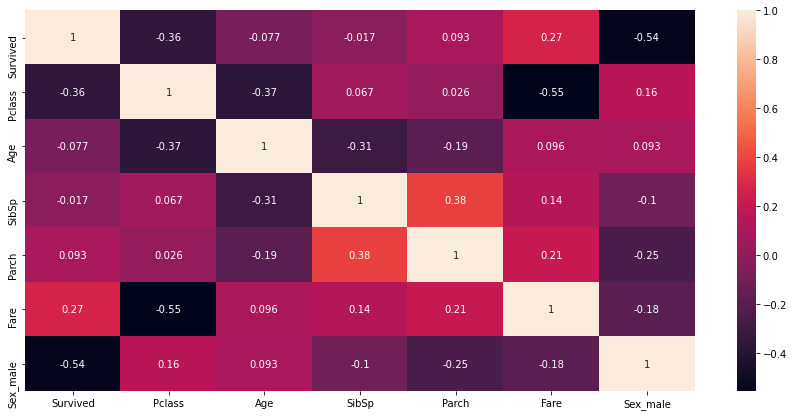

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(cm,annot=True)

#### We can see that Pclass, Sex_male are highly correlated to our dependent dataset ('Survived')

## Barplot of 'Pclass' & 'Survived'

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

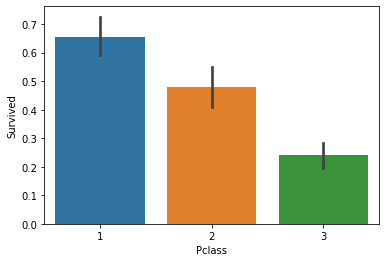

In [14]:
sns.barplot(x='Pclass', y='Survived', data=df)

### As we can see that there is some relation between survival and class.. As Class 1 has higher servival than other
### 

## Barplot of 'Gender' and 'Survived'

Text(0.5, 0, 'Gender')

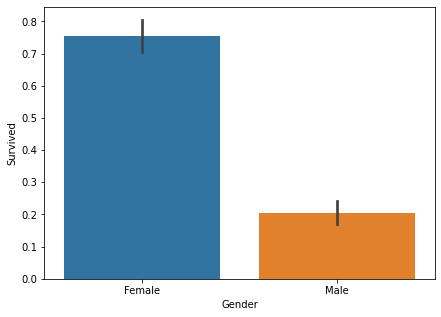

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(7, 5))

sns.barplot(x='Sex_male', y='Survived', data=df , ax=axes )
axes.set_xticklabels(['Female','Male'])
axes.set_xlabel('Gender')


### It is clearly seen that female has higher chances of survival than male
### 

In [16]:
print(df.groupby(['Pclass','Sex_male'])['Survived'].value_counts())

Pclass  Sex_male  Survived
1       0         1            82
                  0             3
        1         0            61
                  1            40
2       0         1            68
                  0             6
        1         0            84
                  1            15
3       0         0            55
                  1            47
        1         0           215
                  1            38
Name: Survived, dtype: int64


#### Now, we can see the number of people survived from male and female
#### 

### Create a dataset with gender, age and survived

In [17]:
df_trail = df.loc[:, ['Sex_male', 'Age','Survived']]

df_trail

,Sex_male,Age,Survived
0,1,22.0,0
1,0,38.0,1
2,0,26.0,1
3,0,35.0,1
4,1,35.0,0
...,...,...,...
885,0,39.0,0
886,1,27.0,0
887,0,19.0,1
889,1,26.0,1


## Survived and not survived count based on class comparison

Text(0, 0.5, 'Count')

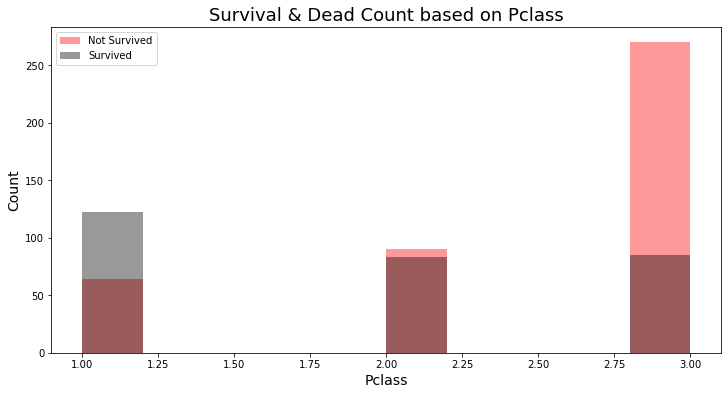

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 6))

ax = sns.distplot(df[df['Survived']==0]['Pclass'], bins=10 ,kde=False, label="Not Survived", color='red')
ax = sns.distplot(df[df['Survived']==1]['Pclass'], bins=10 ,kde=False, label="Survived", color='black')
    
ax.legend()
ax.set_title('Survival & Dead Count based on Pclass',size=18)
ax.set_xlabel("Pclass",size=14)
ax.set_ylabel("Count",size=14)

<AxesSubplot:xlabel='Survived', ylabel='count'>

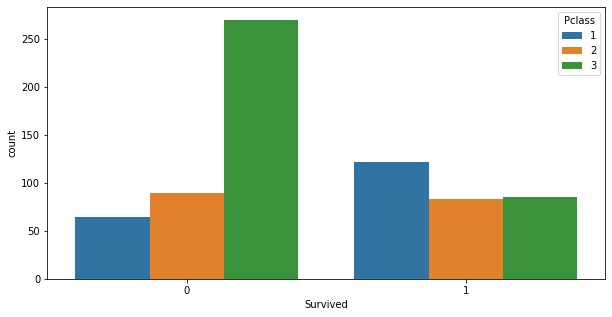

In [19]:
# pretty clear that the passenger class is heavily correlated with survivng
plt.figure(figsize=(10,5))
sns.countplot(x="Survived",hue="Pclass",data=df)

### Create new datasets for male and female

In [20]:
female = df_trail[df_trail['Sex_male']==0]
male = df_trail[df_trail['Sex_male']==1]

print(female.head())

print(male.head())

   Sex_male   Age  Survived
1         0  38.0         1
2         0  26.0         1
3         0  35.0         1
8         0  27.0         1
9         0  14.0         1
    Sex_male   Age  Survived
0          1  22.0         0
4          1  35.0         0
6          1  54.0         0
7          1   2.0         0
12         1  20.0         0


In [21]:
#print(male[male['Survived']==1]['Age'])
#print(male[male['Survived']==1]['Age'].shape)

## Comparison of survival based on 'Age' and 'Gender'

Text(0.5, 1.0, 'Male')

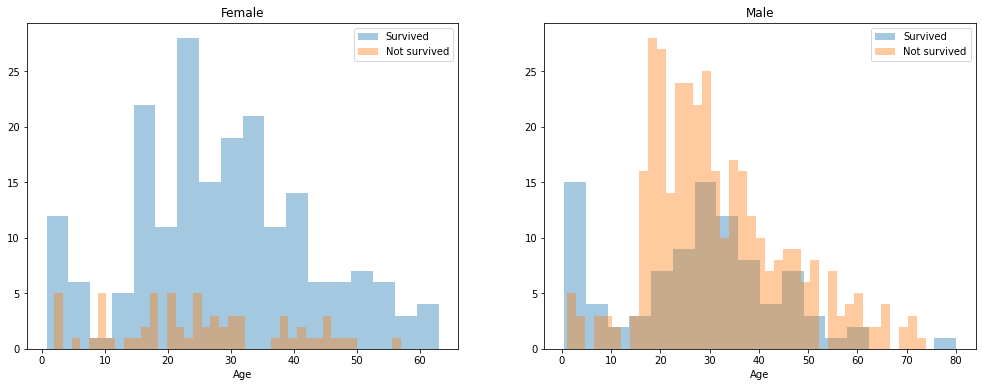

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(17, 6))

ax = sns.distplot(female[female['Survived']==1]['Age'], bins=18, label = "Survived", ax = axes[0], kde =False)
ax = sns.distplot(female[female['Survived']==0]['Age'], bins=40, label = "Not survived", ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')


ax = sns.distplot(male[male['Survived']==1]['Age'], bins=18, label = "Survived", ax = axes[1], kde = False)
ax = sns.distplot(male[male['Survived']==0]['Age'], bins=40, label = "Not survived", ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

#### We can see that, female has higher chances of survival than male.
#### Male has higher chances of survival between 25 to 45 age.
#### 

### check the correlation of our three main columns 'Age',  'Sex_male', 'Pclass' using lmplot

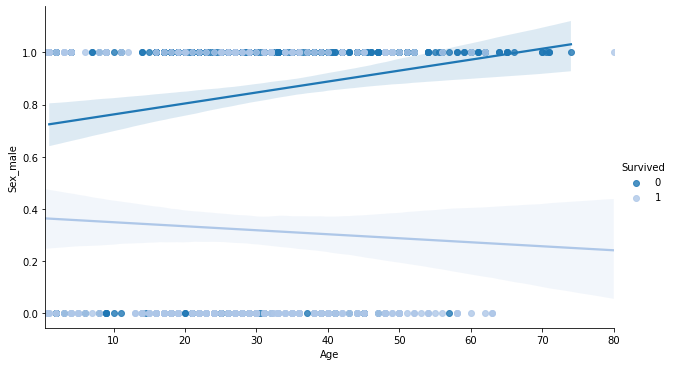

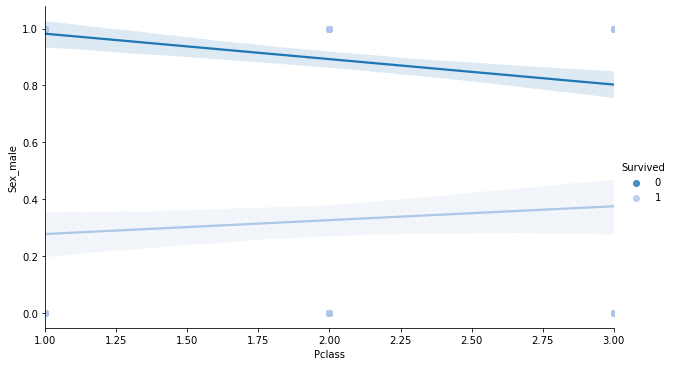

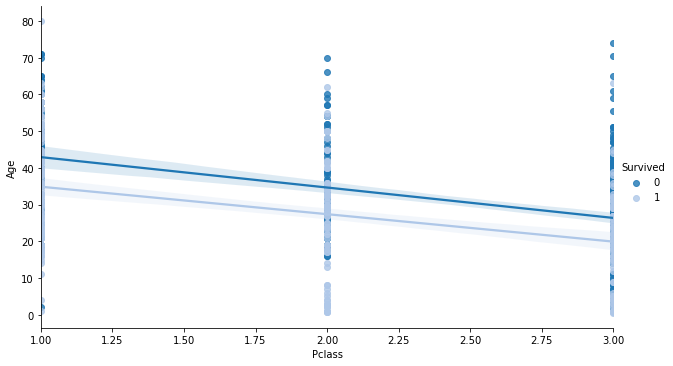

In [23]:
sns.lmplot('Age', 'Sex_male', data=df,  
             palette=sns.color_palette('tab20', n_colors=2),  hue = 'Survived', fit_reg=True,size=5,aspect=1.7 )

sns.lmplot('Pclass', 'Sex_male', data=df,  
             palette=sns.color_palette('tab20', n_colors=2),  hue = 'Survived', fit_reg=True,size=5,aspect=1.7 )


sns.lmplot('Pclass', 'Age', data=df,  
             palette=sns.color_palette('tab20', n_colors=2),  hue = 'Survived', fit_reg=True,size=5,aspect=1.7 )


## We will take 'Pclass', 'Age' & 'Sex_male' as our dependent columns
### As they are highly correlated with our target column

In [24]:
X = pd.DataFrame([df['Pclass'],df['Age'],df['Sex_male']]).transpose().to_numpy()
Y = df['Survived'].to_numpy()

print(X[:5])
print(Y[:5])

[[ 3. 22.  1.]
 [ 1. 38.  0.]
 [ 3. 26.  0.]
 [ 1. 35.  0.]
 [ 3. 35.  1.]]
[0 1 1 1 0]


### As from the data above, we can see that all columns are not in one scale.. and model will find difficulty to understand the scale difference..

### Mean of all columns have very much difference.
### Standard deviation is also not close.

In [25]:
X.mean(axis=0)

array([ 2.23669468, 29.69911765,  0.63445378])

In [26]:
X.std(axis=0)

array([ 0.83766265, 14.51632115,  0.48158299])

### 
### We will use StandardScaler to scaler our values

In [27]:
ss = StandardScaler()

In [28]:
X = ss.fit_transform(X)
X

array([[ 0.91123237, -0.53037664,  0.75905134],
       [-1.47636364,  0.57183099, -1.31743394],
       [ 0.91123237, -0.25482473, -1.31743394],
       ...,
       [-1.47636364, -0.73704057, -1.31743394],
       [-1.47636364, -0.25482473,  0.75905134],
       [ 0.91123237,  0.15850313,  0.75905134]])

### Now, we can see the mean and standard deviation is very close to each other

In [29]:
X.mean(axis=0)

array([-1.87214079e-16,  2.12404013e-16,  1.18485987e-16])

In [30]:
X.std(axis=0)

array([1., 1., 1.])

## 
## Split the dataset in training and testing sets

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

#### Check shape of training and testing sets

In [32]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(571, 3)
(143, 3)
(571,)
(143,)


## Train Decision Tree algorithm

In [33]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)

Y_predict = decision_tree.predict(X_test)

### Compare the predicted values 

In [34]:
dt = {'Values':['Value1','Value2','Value3','Value4','Value5','Value6','Value7'],
      'Actual':Y_test[:7],
     'Decision Tree':Y_predict[:7]}
pred_test = pd.DataFrame(dt)
pred_test

,Values,Actual,Decision Tree
0,Value1,1,0
1,Value2,0,0
2,Value3,0,1
3,Value4,0,0
4,Value5,1,0
5,Value6,1,1
6,Value7,1,0


## Errors Comparison

In [35]:
matrix_evaluation = pd.DataFrame({'Kernal' :['Decision Tree'],
                                'MAE': [mean_absolute_error(Y_test,Y_predict)], 
                                'MSE': [mean_squared_error(Y_test,Y_predict)],
                                'RMSE': [np.sqrt(mean_squared_error(Y_test,Y_predict))],
                                'R2_score': [r2_score(Y_test,Y_predict)],
                                'Accuracy Score': [accuracy_score(Y_test,Y_predict)] })


matrix_evaluation

,Kernal,MAE,MSE,RMSE,R2_score,Accuracy Score
0,Decision Tree,0.216783,0.216783,0.4656,0.109839,0.783217


### We can clearly see that, it gives good accuracy
### MAE, MSE are very less.
### 

## Confusion matrix

In [36]:
cml = confusion_matrix(Y_test, Y_predict)
print("\nConfusion matrix of Decision Tree:\n",cml)


Confusion matrix of Decision Tree:
 [[77  6]
 [25 35]]


## Graphical representation of Confusion matrix

Text(0, 0.5, 'Actual Values')

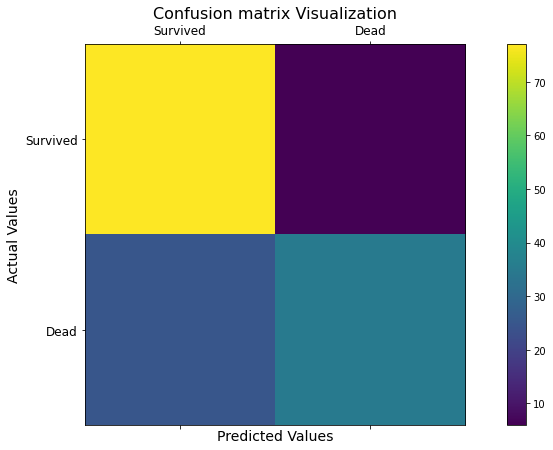

In [37]:
labels = ['Survived','Dead']

fig = plt.figure(figsize=(15,7))
axes = fig.add_subplot()

mv = axes.matshow(cml)
axes.set_title('Confusion matrix Visualization',size='16')
fig.colorbar(mv)
axes.set_xticklabels([''] + labels,size='12')
axes.set_yticklabels([''] + labels,size='12')
axes.set_xlabel('Predicted Values',size='14')
axes.set_ylabel('Actual Values',size='14')

## 
## Classification Report

In [38]:
crl = classification_report(Y_test,Y_predict,target_names=labels)
print("\n\nClassification Report of Decision Tree: \n\n",crl)



Classification Report of Decision Tree: 

               precision    recall  f1-score   support

    Survived       0.75      0.93      0.83        83
        Dead       0.85      0.58      0.69        60

    accuracy                           0.78       143
   macro avg       0.80      0.76      0.76       143
weighted avg       0.80      0.78      0.77       143



### More accuracy and f1 score.
### 

In [39]:
# Create a function to guess the flower type
def check(Pclass, Ageclass, Male):
    if decision_tree.predict([[Pclass, Ageclass, Male]]) == 1:
        print('Prediction: Survived !')
    else:
        print('Prediction: Not Survived !')

## Find a random data to test model

In [40]:
import random 
random.seed(1234)

# Gives a random number between 0 and total length of the dataset
random_num = random.randint(0,len(df))

# Selects a random column with random number we found above
trail = df.loc[:, ['Pclass','Age','Sex_male']].iloc[random_num]

trail

#df.loc[:,'Survived'][random_num]
#df.iloc[random_num]['Survived']

Pclass       2.0
Age         62.0
Sex_male     1.0
Name: 570, dtype: float64

In [41]:
print(X_test.shape)
print(trail.shape)

(143, 3)
(3,)


In [42]:
trail = trail.values.reshape(-1,1)
trail.shape

(3, 1)

In [43]:
trail = ss.fit_transform(trail)
trail

array([[-0.68950457],
       [ 1.4140687 ],
       [-0.72456413]])

In [44]:
trail = trail.reshape(1,-1)
trail.shape

(1, 3)

### Compare each predicted value of different kernels for the random data

In [45]:
pred = pd.DataFrame({'Type': ['Actual value', 'Decision Tree'],
                         'Value': [df.iloc[random_num]['Survived'], 
                                   decision_tree.predict(trail)[0]]})

pred

,Type,Value
0,Actual value,1
1,Decision Tree,1


### Check with our functions

In [46]:
check(trail[:,0][0],trail[:,1][0],trail[:,2][0])

Prediction: Survived !


## Which group is likely to survive more.?
#### 

#### As we can see,
### Passenger class 1, 
### Young Age people 
### Female 
#### are more likely to survive than others 

## 
## Plot Decision Tree

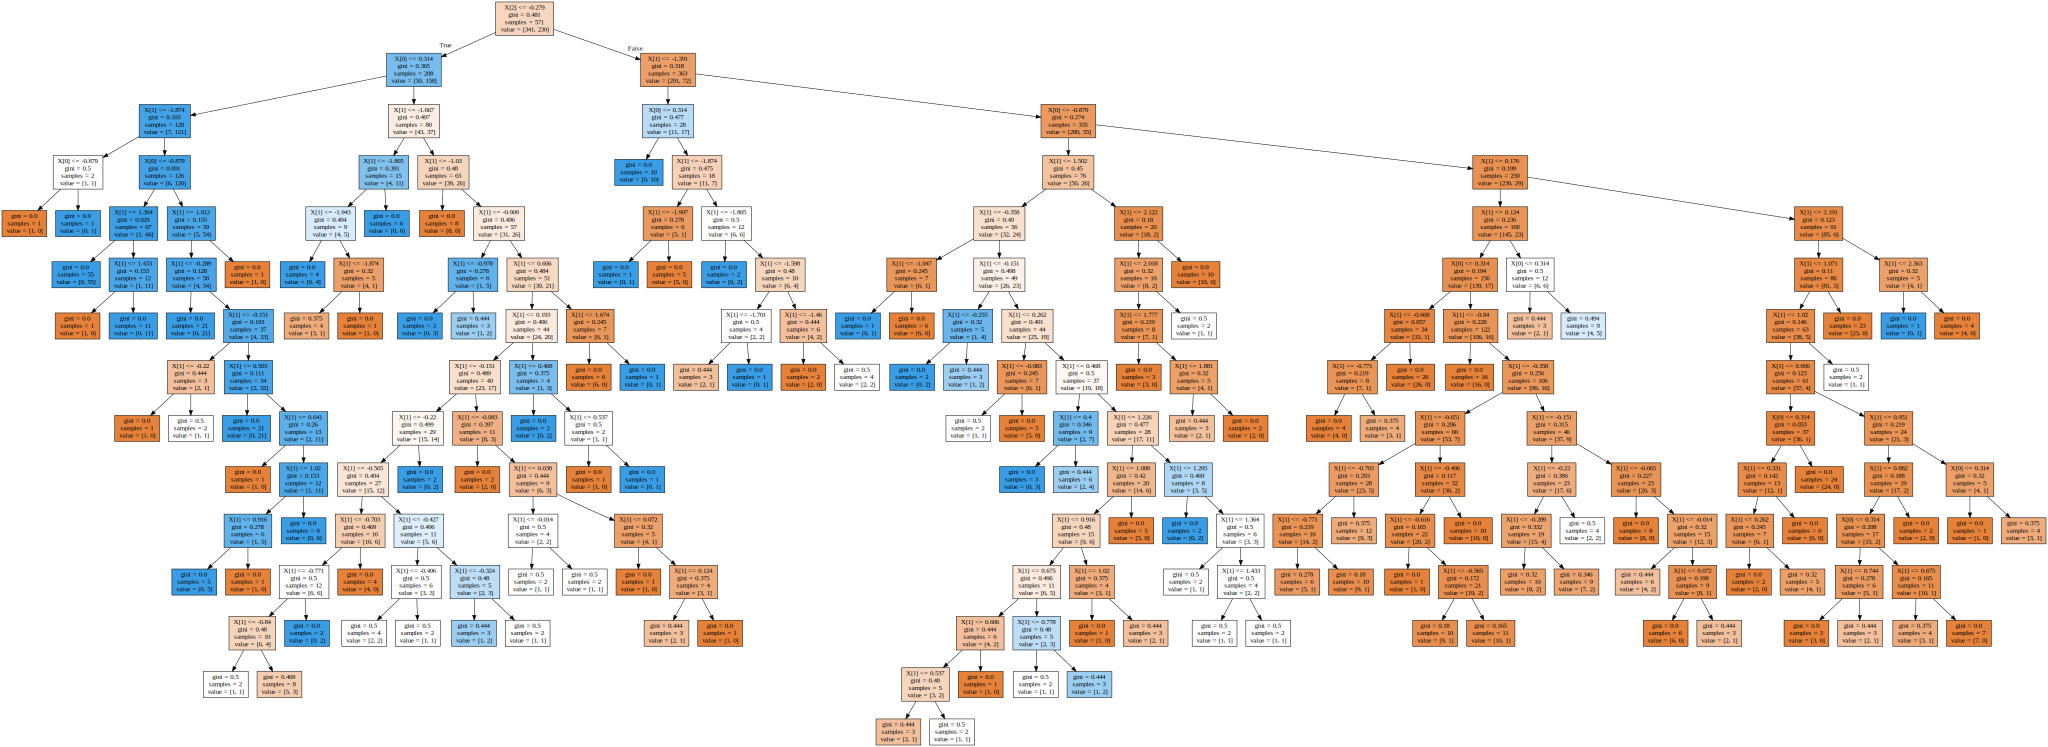

In [47]:
import graphviz
from sklearn.tree import export_graphviz
import pydotplus


dot_data = tree.export_graphviz(decision_tree, out_file=None,filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

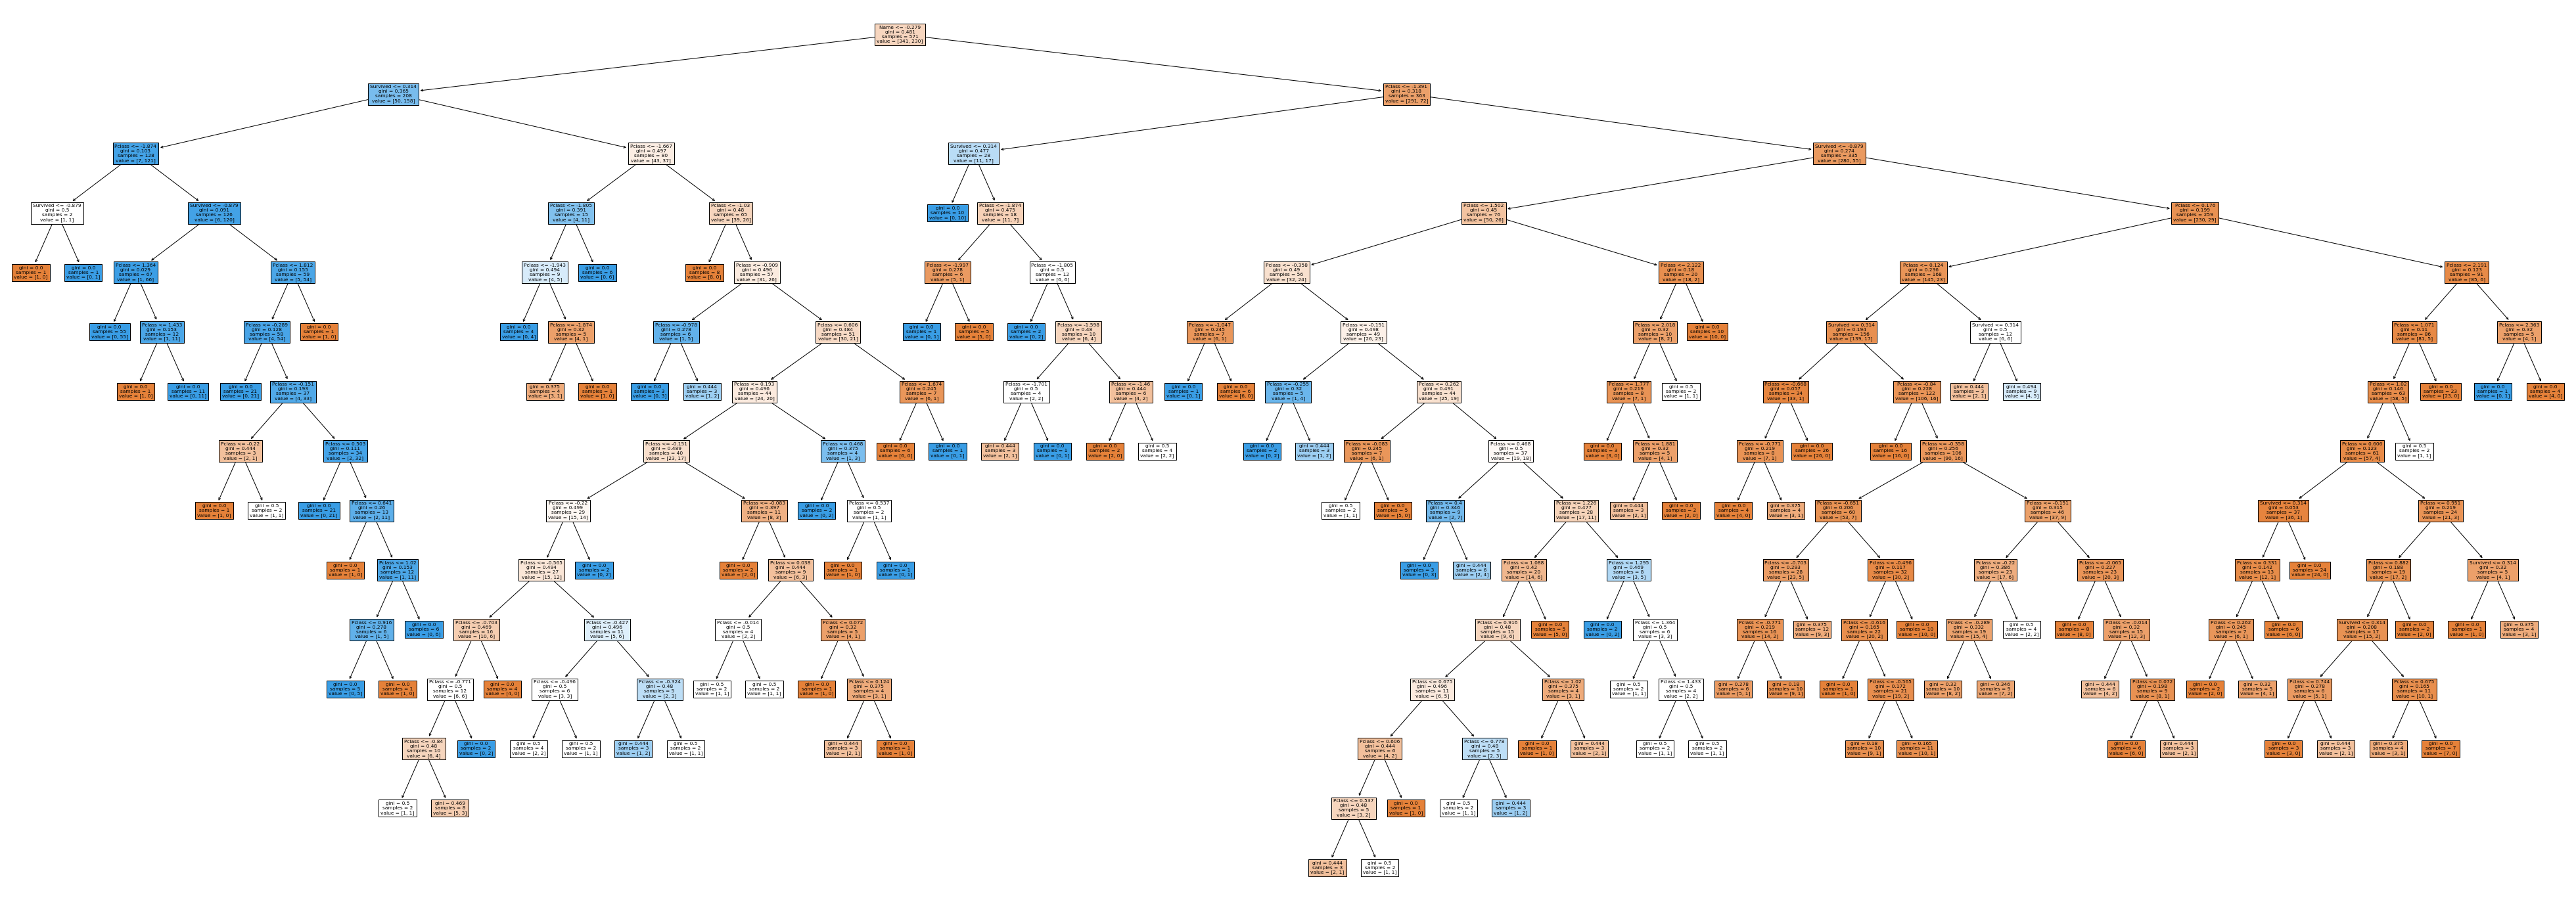

In [67]:
fig = plt.figure(figsize=(70,25))
tree.plot_tree(decision_tree,feature_names=df.columns,filled=True);

# 

### So, we get to know that, 
#### Female are more likely to survive than male
#### Young people are more likely to survive than others
#### Passenger Class 1 people are more likely to survive than class 2 and class 3